In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob

import tensorflow as tf
import pickle
import os
import glob
import random
import sys
import datetime
import wispy
import wispy.resnet
import wispy.logger
import wispy.utils
import wispy.callbacks
import wispy.model_utils
from tomlkit import parse
from tensorflow.keras.utils import get_custom_objects
import pugna.activations

plt.style.use("ggplot")
mpl.rcParams.update({"font.size": 16})

In [2]:
sys.path.append("../../")

In [3]:
import fit

In [4]:
get_custom_objects().update({'s2relu': pugna.activations.s2relu})

In [5]:
%matplotlib inline

In [6]:
glob.glob("002/*.h5")

['002/model.h5']

In [7]:
config_file = "config_002.toml"

In [8]:
model = tf.keras.models.load_model('002/model.h5',
                                   custom_objects={'ScaleLayer': wispy.mscalev3.ScaleLayer}
                                  )

In [9]:
with open(config_file, "r") as f:
    text = f.read()

doc = parse(text)

In [10]:
doc['data']['train_root_dir']

'../training_data'

In [11]:
doc['data']['data_to_model']

'amps'

In [12]:
filename = doc['data']['y_preprocessing_params_file']
y_processing_params = np.load(filename)

In [16]:
y_train_amp22 = fit.load_coprec_data_and_apply_preproc(doc['data']['train_root_dir'], "amp_22", y_processing_params)
y_train_amp21 = fit.load_coprec_data_and_apply_preproc(doc['data']['train_root_dir'], "amp_21", y_processing_params)

In [17]:
y_train_amp22.shape

(100000, 1219)

In [18]:
y_train_amp21.shape

(100000, 1219)

In [19]:
filename = doc['data']['times_file']
times = np.load(filename)

pkl_filename = doc['data']['times_scaler']
with open(pkl_filename, 'rb') as file:
    times_scaler = pickle.load(file)

times_scaled = times_scaler.transform(times[:, np.newaxis])

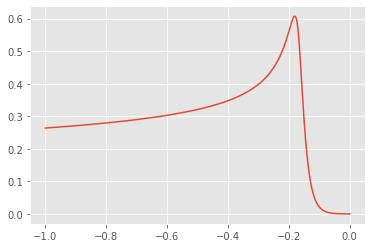

In [20]:
plt.figure()
plt.plot(times_scaled, y_train_amp22[0])

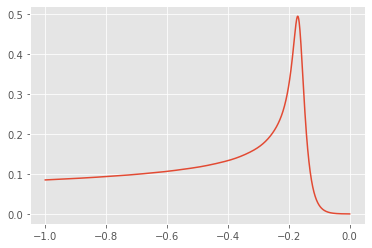

In [21]:
plt.figure()
plt.plot(times_scaled, y_train_amp21[0])

In [22]:
filename = doc['data']['coords_train_file']
coords_train = np.load(filename).T

In [23]:
def get_input_for_ann(times, coords):
    return np.column_stack((times[:, 0], (coords*np.ones(times.shape))))

In [24]:
X = get_input_for_ann(times_scaled, coords_train[0])

In [25]:
X.shape

(1219, 8)

In [26]:
coords_train.shape

(100000, 7)

In [36]:
def compare(index, model, times_scaled, coords, y_train, title, output_index):
    print(coords[index])
    X = get_input_for_ann(times_scaled, coords[index])
    yhat = model.predict(X)
    
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    plt.plot(times_scaled, y_train[index], label='data')
    plt.plot(times_scaled, yhat[:,output_index], label='model')
    plt.title(title)
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(times_scaled, y_train[index]-yhat[:,output_index])
    plt.show()
    plt.close()

# amp22

[3.99970816 0.25831867 1.60006693 5.00792839 0.         0.
 0.        ]


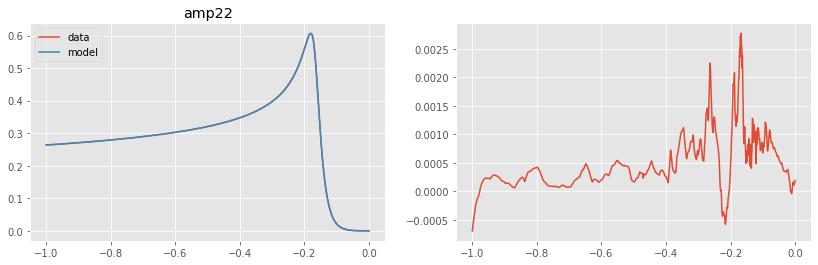

In [37]:
compare(0, model, times_scaled, coords_train, y_train_amp22, title='amp22', output_index=0)

94677
[1.9670763  0.76505387 1.33659715 2.47195579 0.         0.
 0.        ]


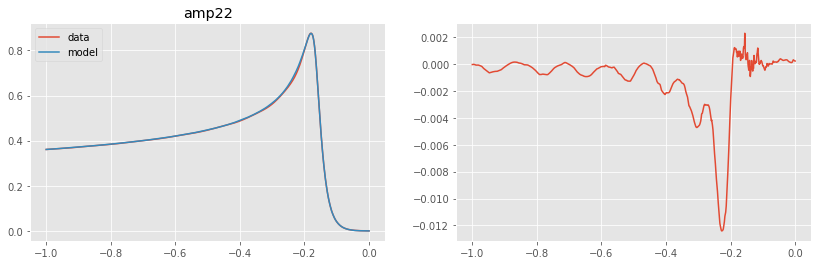

31994
[1.96161101 0.44297616 1.59899848 0.7362265  0.         0.
 0.        ]


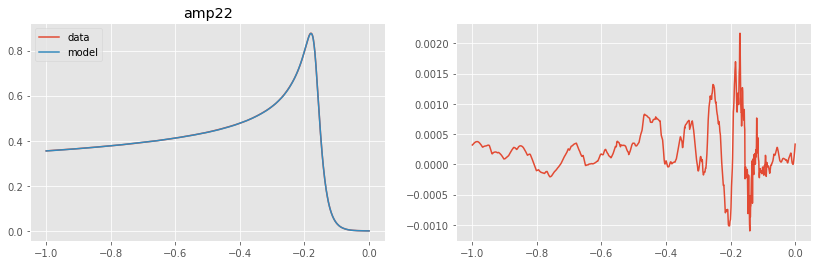

27731
[2.6551471  0.11540491 2.15980059 6.00459742 0.         0.
 0.        ]


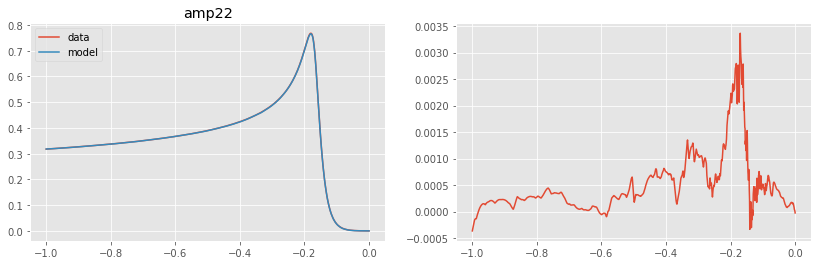

9685
[2.84846742 0.51737511 2.35368288 0.20061333 0.         0.
 0.        ]


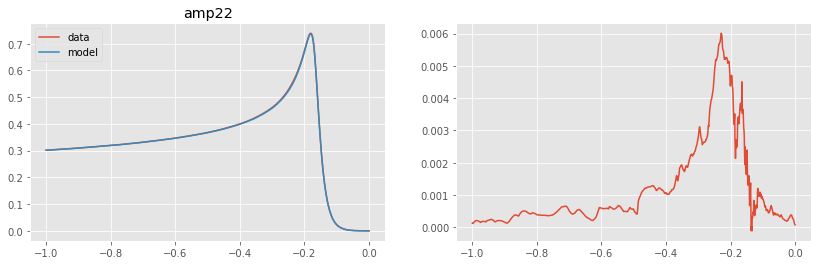

9550
[3.12188697 0.45037074 1.65248339 2.20654991 0.         0.
 0.        ]


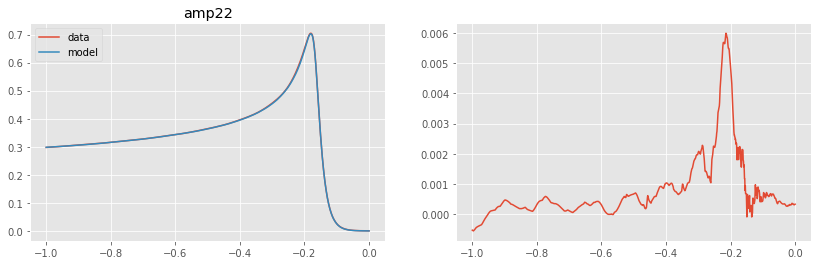

4660
[3.32508684 0.92212614 2.44492727 2.24945744 0.         0.
 0.        ]


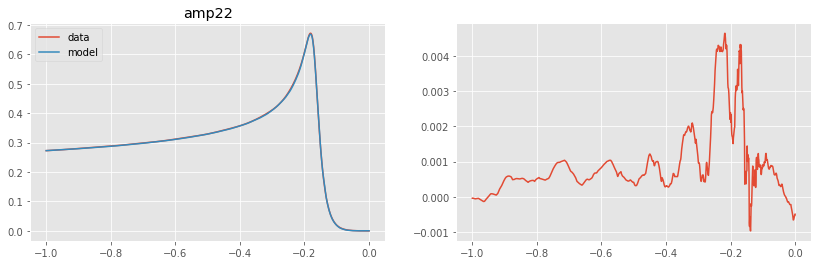

14959
[1.09776111 0.09746224 2.91900325 1.99476013 0.         0.
 0.        ]


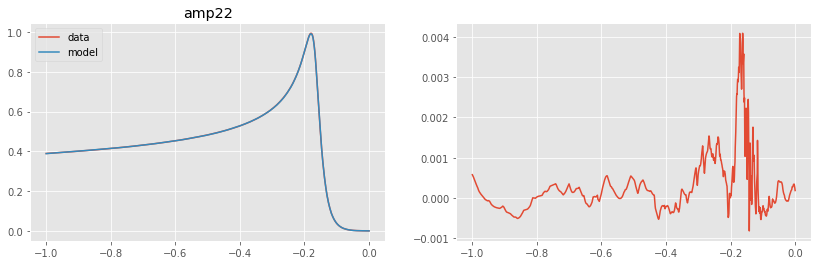

97236
[2.67082215 0.18229796 0.24714106 5.5850404  0.         0.
 0.        ]


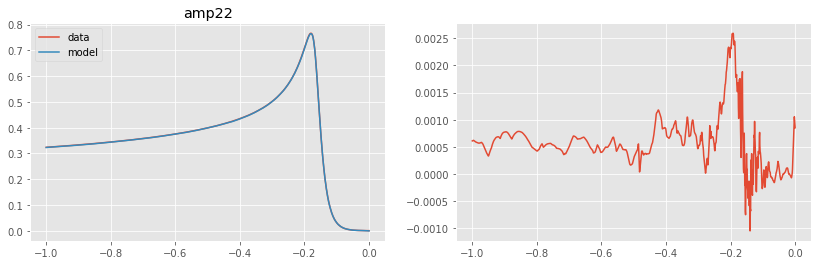

24675
[2.74211487 0.16659987 0.41792335 0.69015706 0.         0.
 0.        ]


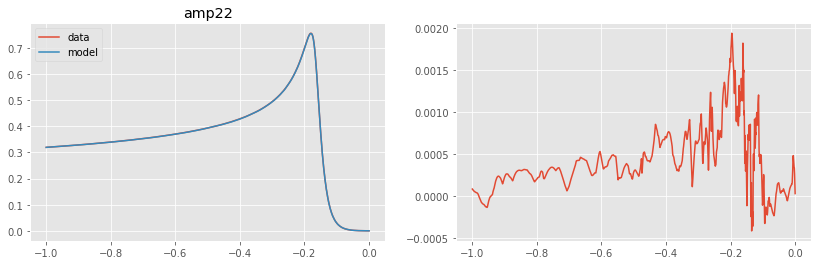

24807
[3.56192475 0.71294435 2.32782238 2.39570784 0.         0.
 0.        ]


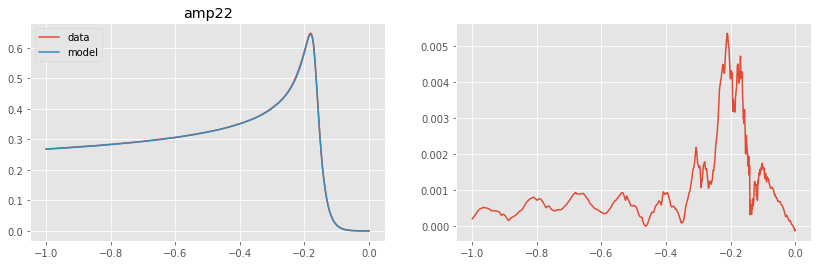

In [40]:
for i in random.sample(range(len(coords_train)), 10):
    print(i)
    compare(i, model, times_scaled, coords_train, y_train_amp22, title='amp22', output_index=0)

# amp21

[3.99970816 0.25831867 1.60006693 5.00792839 0.         0.
 0.        ]


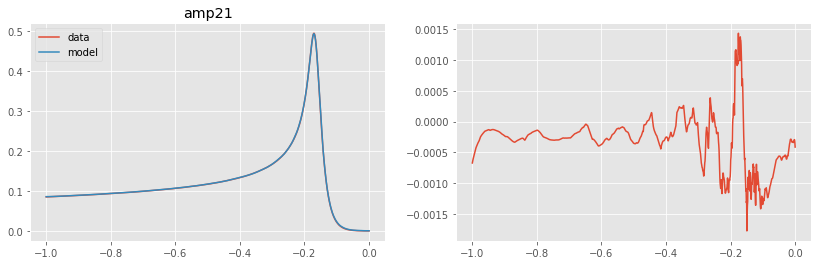

In [41]:
compare(0, model, times_scaled, coords_train, y_train_amp21, title='amp21', output_index=1)

51876
[1.40711086 0.54486746 2.69938656 5.30221856 0.         0.
 0.        ]


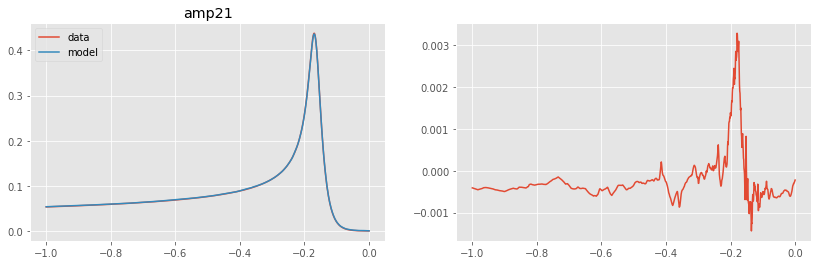

1882
[1.08286108 0.21707802 2.46504424 0.71628611 0.         0.
 0.        ]


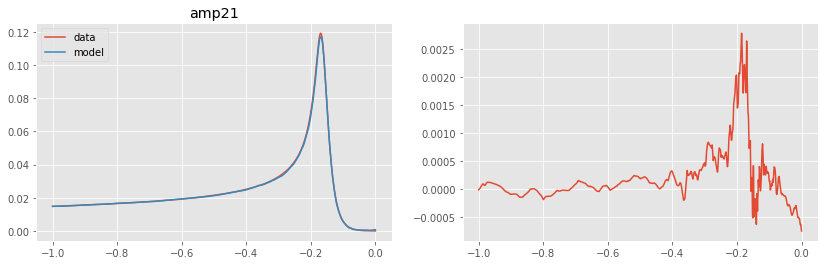

26794
[2.12865928 0.01835958 2.19900629 5.95894688 0.         0.
 0.        ]


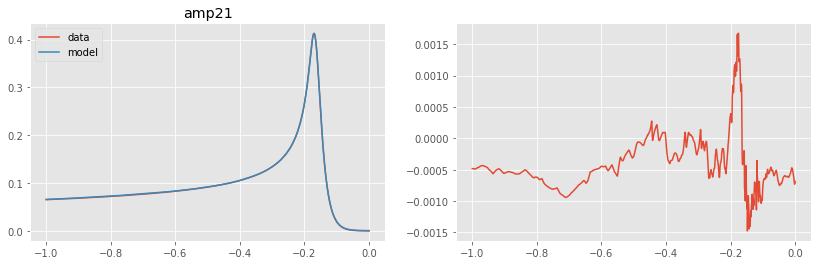

94609
[3.12961894 0.87439373 1.13553223 4.17677887 0.         0.
 0.        ]


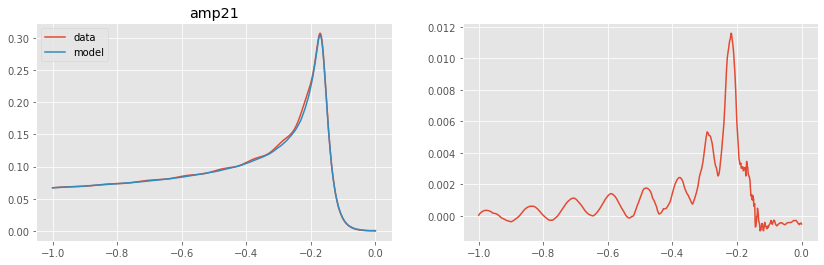

17241
[3.82596361 0.35875381 2.61901941 4.16405285 0.         0.
 0.        ]


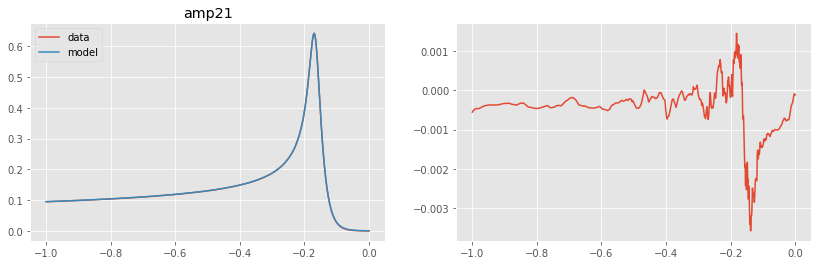

51164
[2.53036454 0.57794402 1.27422215 5.81600922 0.         0.
 0.        ]


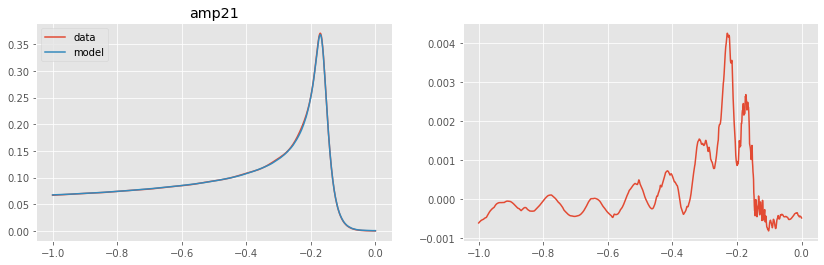

54927
[1.11486339 0.08795268 1.21200466 1.26106411 0.         0.
 0.        ]


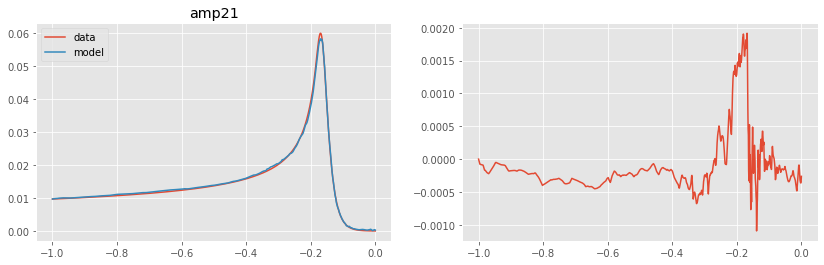

5226
[1.63945199 0.57137782 1.52247444 5.21226084 0.         0.
 0.        ]


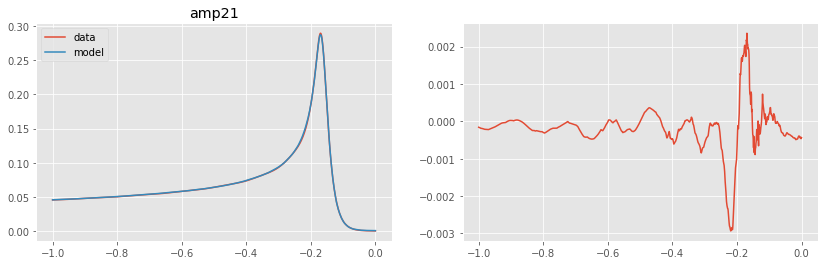

82161
[1.23773433 0.31108575 1.95148992 0.66567417 0.         0.
 0.        ]


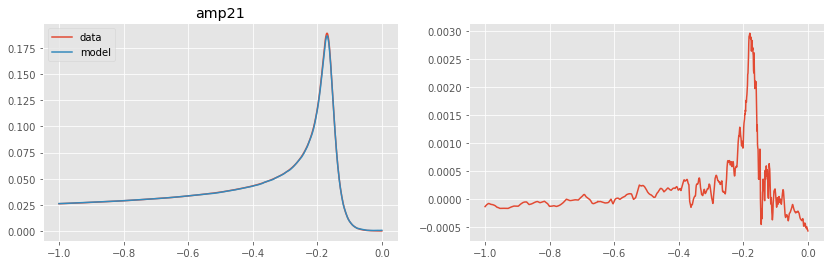

65787
[2.83789844 0.90037322 2.50268792 5.88723047 0.         0.
 0.        ]


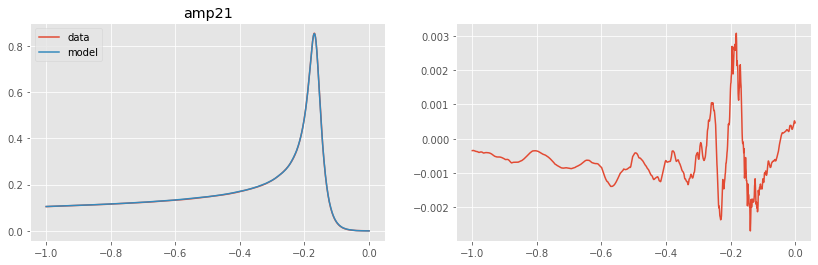

In [42]:
for i in random.sample(range(len(coords_train)), 10):
    print(i)
    compare(i, model, times_scaled, coords_train, y_train_amp21, title='amp21', output_index=1)